In [6]:
import numpy as np
import cv2
import yaml
import matplotlib.pyplot as plt
import os
import random

import keras
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD

Using TensorFlow backend.


In [21]:
path_train = "../../../data/bosch/"
with open(os.path.join(path_train ,"train.yaml"), 'r') as stream:
    try:
        data = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)
        
labels = ["Red", "Yellow", "Green"]
train_data = []
for d in data:
    to_append = {"path" : d["path"], "boxes" : []}
    for b in d["boxes"]:
        if (b["occluded"] is False) and (b["label"] in labels):
            to_append["boxes"].append(b)
    if len(to_append["boxes"]) > 0:
        train_data.append(to_append)

In [22]:
path_train_add = "../../../data/bosch_additional/"
with open(os.path.join(path_train_add ,"additional_train.yaml"), 'r') as stream:
    try:
        data = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

train_data_add = []
labels = ["Red", "Yellow", "Green"]
for d in data:
    to_append = {"path" : d["path"], "boxes" : []}
    for b in d["boxes"]:
        if (b["occluded"] is False) and (b["label"] in labels):
            to_append["boxes"].append(b)
    if len(to_append["boxes"]) > 0:
        train_data_add.append(to_append)

In [23]:
path_test = "../../../data/bosch_test/"
with open(os.path.join(path_test ,"test.yaml"), 'r') as stream:
    try:
        data = yaml.load(stream)
    except yaml.YAMLError as exc:
        print(exc)

test_data = []
labels = ["Red", "Yellow", "Green"]
for d in data:
    to_append = {"path" : d["path"], "boxes" : []}
    for b in d["boxes"]:
        if (b["occluded"] is False) and (b["label"] in labels):
            to_append["boxes"].append(b)
    if len(to_append["boxes"]) > 0:
        test_data.append(to_append)

In [44]:
# Here we extract the bounding boxes 

random.seed(0)


path_save = "../../../data/traffic_lights_from_bosch/"
count = 0
for d in train_data:
    image = cv2.imread(os.path.join(path_train, d["path"]))
    for tl in d["boxes"]:
        x_min = max(int(tl["x_min"]), 0) 
        x_max = max(int(tl["x_max"]), 0)
        y_min = max(int(tl["y_min"]), 0)
        y_max = max(int(tl["y_max"]), 0)
        deltax = x_max - x_min
        if (deltax > 20) and (deltax < 40):                   #If the traffic light in the image is already big enough
            miss = 40 - deltax
            for i in range(5):
                wide_x_up = random.randint(0, miss)
                wide_x_down = miss - wide_x_up
                y_center = (y_max + y_min) //2
                cropped = image[y_center - 25 : y_center + 25 , x_min - wide_x_down - 5 : x_max + wide_x_up + 5, :]
                if cropped.shape == (50, 50, 3):
                    filename = str(count).zfill(5) + "_" + str(tl["label"]) + ".png"
                    count += 1
                    cv2.imwrite(os.path.join(path_save, str(tl["label"]) , filename), cropped)


In [45]:

for d in train_data_add:
    image = cv2.imread(os.path.join(path_train_add, d["path"]))
    for tl in d["boxes"]:
        x_min = max(int(tl["x_min"]), 0) 
        x_max = max(int(tl["x_max"]), 0)
        y_min = max(int(tl["y_min"]), 0)
        y_max = max(int(tl["y_max"]), 0)
        deltax = x_max - x_min
        if (deltax > 20) and (deltax < 40):                   #If the traffic light in the image is already big enough
            miss = 40 - deltax
            for i in range(5):
                wide_x_up = random.randint(0, miss)
                wide_x_down = miss - wide_x_up
                y_center = (y_max + y_min) //2
                cropped = image[y_center - 25 : y_center + 25 , x_min - wide_x_down - 5 : x_max + wide_x_up + 5, :]
                if cropped.shape == (50, 50, 3):
                    filename = str(count).zfill(5) + "_" + str(tl["label"]) + ".png"
                    count += 1
                    cv2.imwrite(os.path.join(path_save, str(tl["label"]) , filename), cropped)

In [46]:

for d in test_data:
    image = cv2.imread(os.path.join(path_test, "rgb/test", os.path.split(d["path"])[1]))
    for tl in d["boxes"]:
        x_min = max(int(tl["x_min"]), 0) 
        x_max = max(int(tl["x_max"]), 0)
        y_min = max(int(tl["y_min"]), 0)
        y_max = max(int(tl["y_max"]), 0)
        deltax = x_max - x_min
        if (deltax > 20) and (deltax < 40):                   #If the traffic light in the image is already big enough
            miss = 40 - deltax
            for i in range(5):
                wide_x_up = random.randint(0, miss)
                wide_x_down = miss - wide_x_up
                y_center = (y_max + y_min) //2
                cropped = image[y_center - 25 : y_center + 25 , x_min - wide_x_down - 5 : x_max + wide_x_up + 5, :]
                if cropped.shape == (50, 50, 3):
                    filename = str(count).zfill(5) + "_" + str(tl["label"]) + ".png"
                    count += 1
                    cv2.imwrite(os.path.join(path_save, str(tl["label"]) , filename), cropped)


In [3]:
path_save = "../../../data/traffic_lights_from_bosch/"
y = []
X = []
for dr in os.listdir(path_save):
    for fil in os.listdir(os.path.join(path_save, dr)):
        if "Green" in fil:
            y.append(np.array([0,0,1]))
        elif "Red" in fil:
            y.append(np.array([1,0,0]))
        elif "Yellow" in fil:
            y.append(np.array([0,1,0]))
        else:
            continue
        image = cv2.imread(os.path.join(path_save, dr, fil))
        X.append(np.array(image))
        

X_train = np.array(X)
y_train = np.array(y)

    

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [68]:


batch_size = 32
epochs = 15
input_shape = (50, 50, 3)
num_classes = 3

model = Sequential()
model.add(Convolution2D(32, kernel_size=(2, 2),padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


model.summary()
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_data=(X_test, y_test))





Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
__________

In [7]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")

IndexError: list index out of range

In [8]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#score = loaded_model.evaluate(X, Y, verbose=0)
#print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk


In [10]:
loaded_model.predict(X_train[0:1,:,:,:])

array([[ 0.,  0.,  1.]], dtype=float32)

In [11]:
X_train.shape

(4563, 50, 50, 3)

In [23]:
image  = cv2.imread("00003.png").reshape(1,50,50,3)

In [24]:
image.shape

(1, 50, 50, 3)

In [25]:
loaded_model.predict(image)

array([[  4.70353886e-02,   1.67888993e-31,   9.52964604e-01]], dtype=float32)

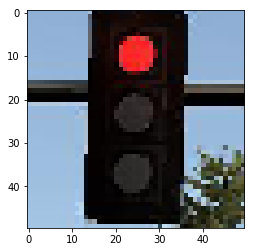

In [26]:
plt.imshow(image[0])
plt.show()